In [9]:
import pandas as pd
import numpy as np
import xarray as xr
import proplot as pplt
import os

dataloc = '../../data/adc_dn_tracks/'
metadata = pd.read_csv(dataloc + 'DN_buoy_list_v2.csv')
metadata['filename'] = ['_'.join([x, str(y), z]) for 
                        x, y, z in zip(metadata['DN Station ID'],
                                       metadata['IMEI'],
                                       metadata['Sensor ID'])]
metadata.set_index('Sensor ID', inplace=True)
files = os.listdir(dataloc)
files = [file for file in files if file[0] != 'D']
files = [file for file in files if file.split('.')[-1] != 'xml']
files = [file for file in files if file != '.DS_Store']
buoy_data = {}
for file in files:
    buoy_data[file.replace('.csv', '').split('_')[-1]] = pd.read_csv(dataloc + file,
                                            index_col='datetime', parse_dates=True)
    
dataloc = '../data/mosaic_qc/'
files = os.listdir(dataloc)
files = [file for file in files if file[0] != 'D']
files = [file for file in files if file.split('.')[-1] != 'xml']
files = [file for file in files if file != '.DS_Store']
buoy_data_30min = {}
for file in files:
    buoy_data_30min[file.replace('.csv', '').split('_')[-1]] = pd.read_csv(dataloc + file,
                                            index_col='datetime', parse_dates=True)



In [13]:
month_start = pd.date_range('2019-10-01', '2021-01-01', freq='1MS')
idx = 0


Sensor ID
2019F4       1
2019I4       1
2019P153     1
2019P161     1
ASFSTUCB1    1
            ..
2020P231     5
2020P234     5
2020P232     5
2020P233     5
2020P236     5
Name: Deployment Leg, Length: 216, dtype: int64

mkdir: ../qc/: File exists


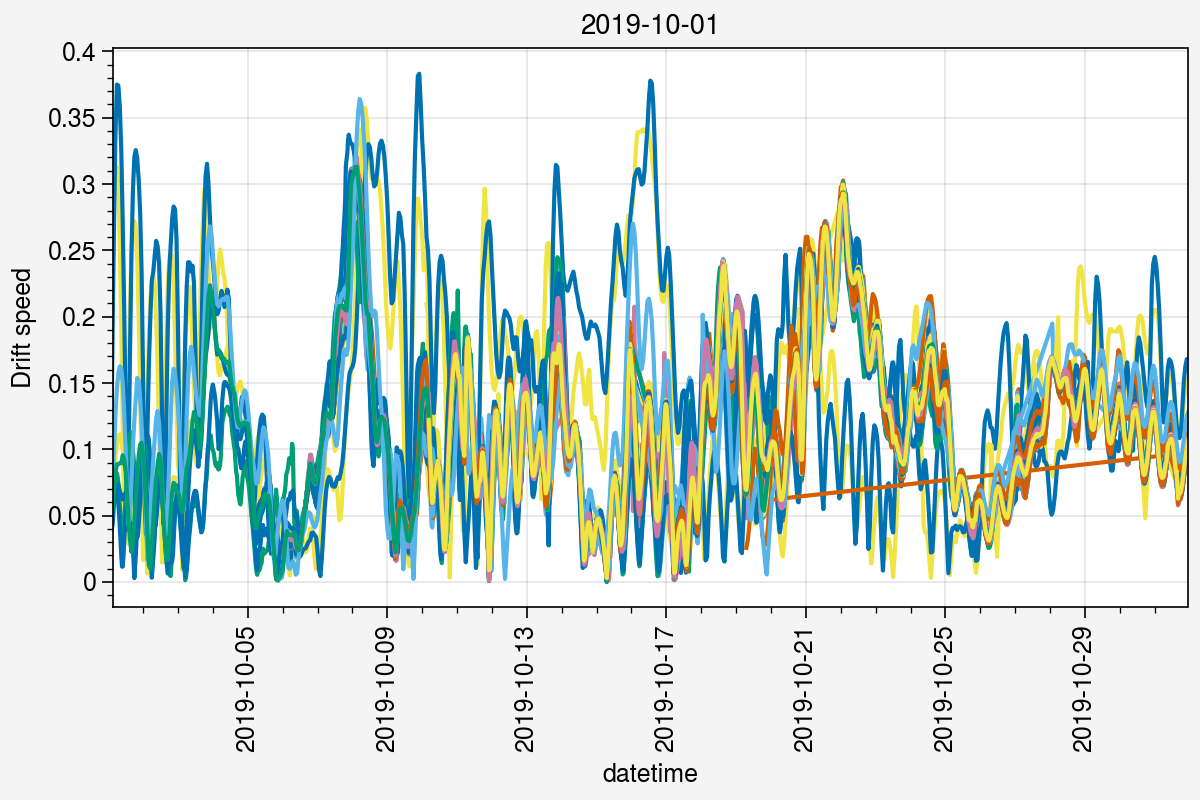

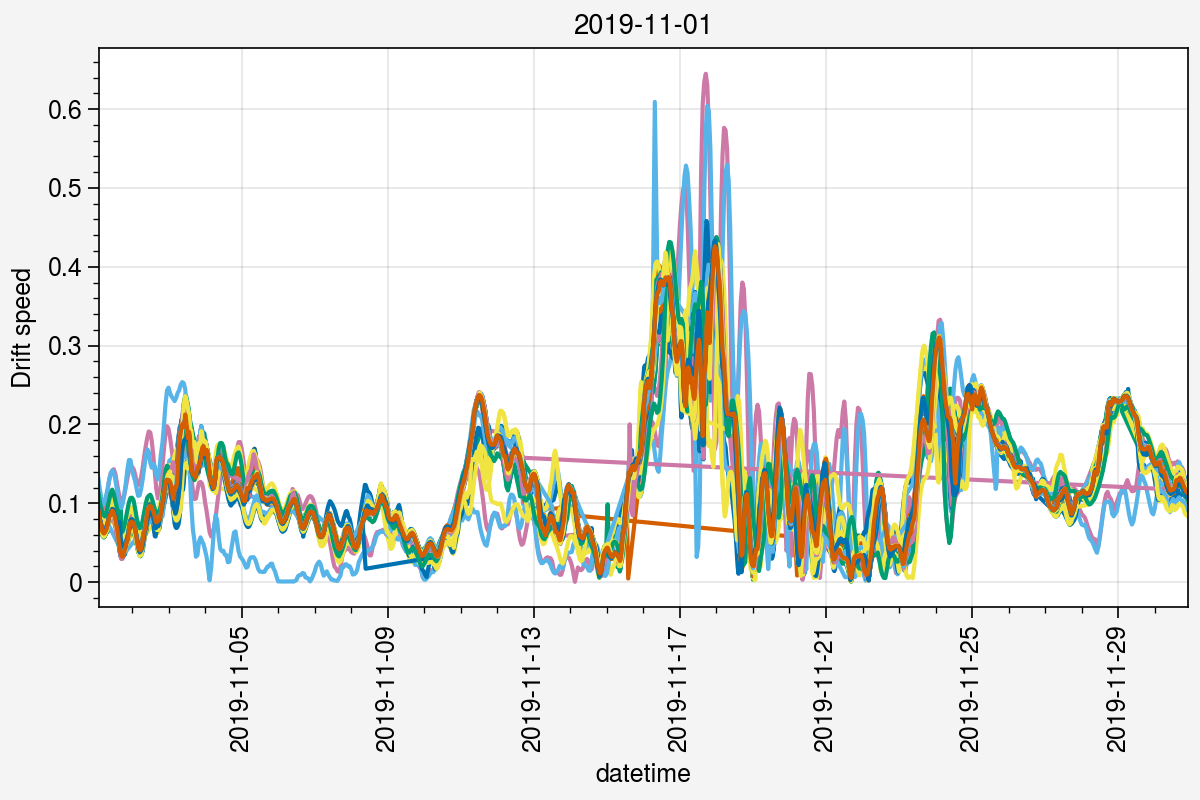

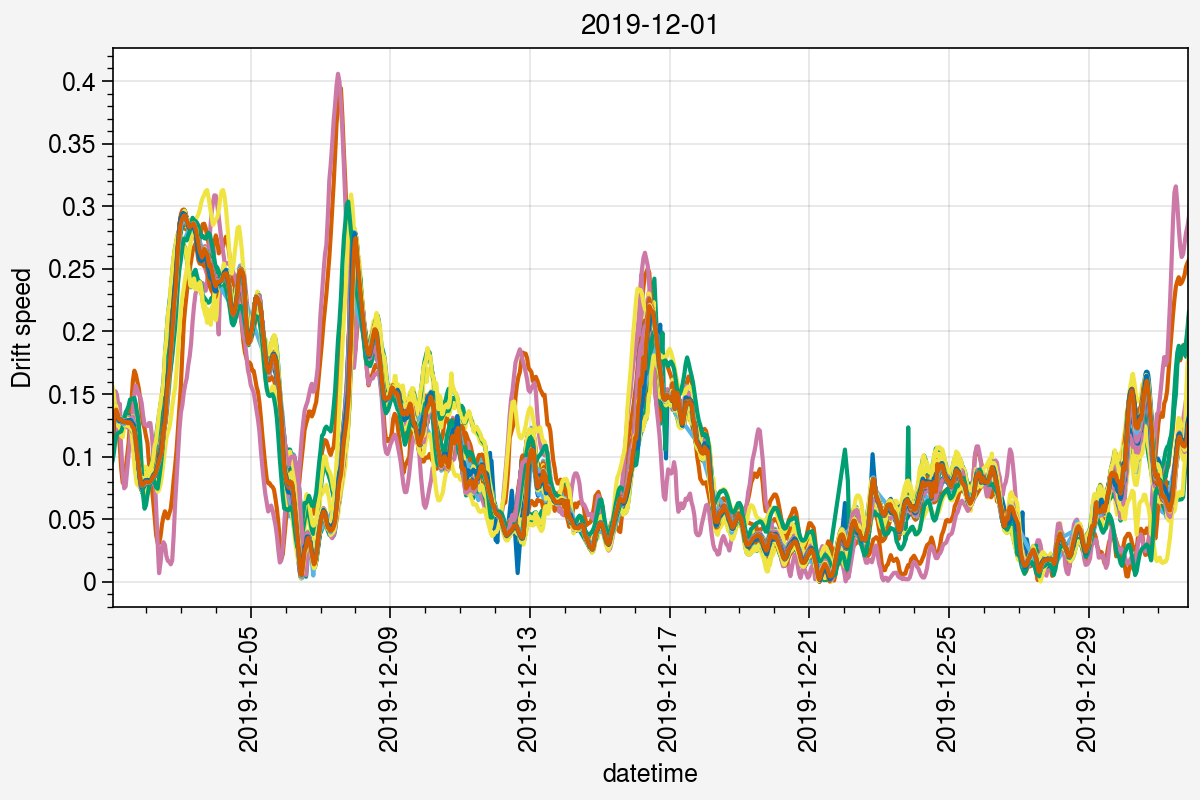

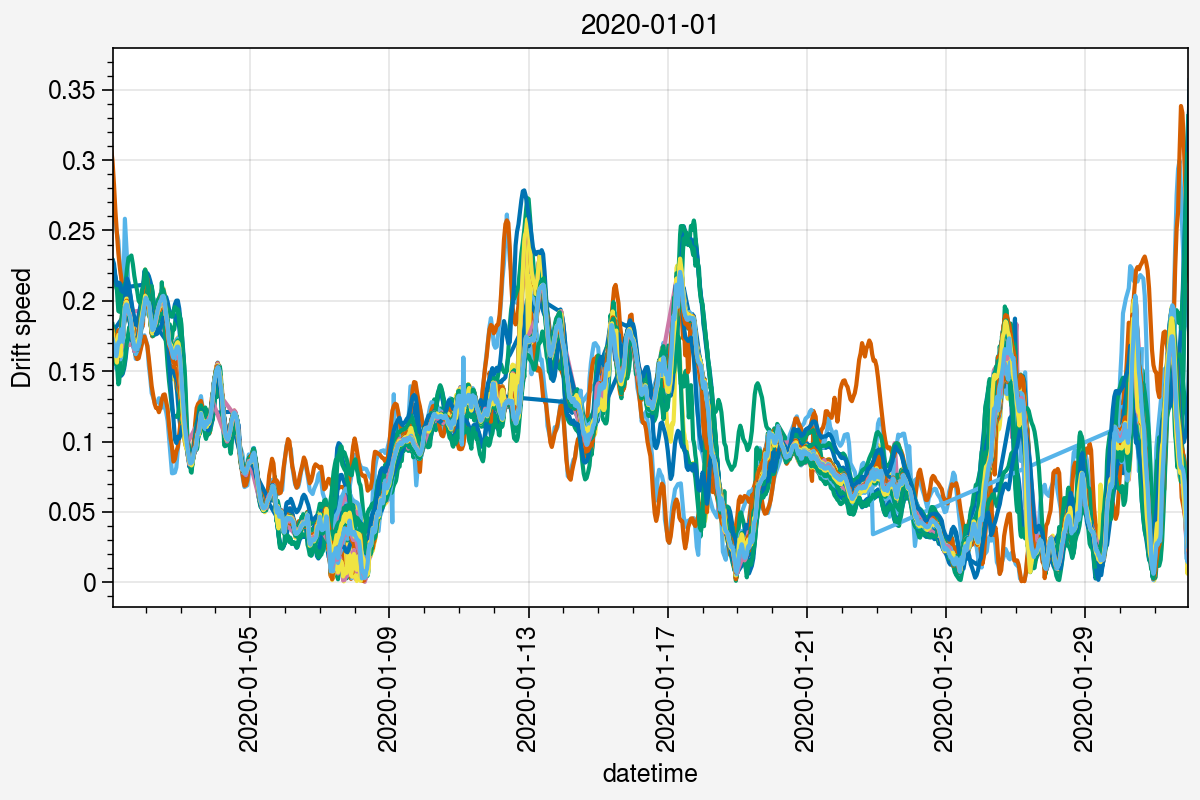

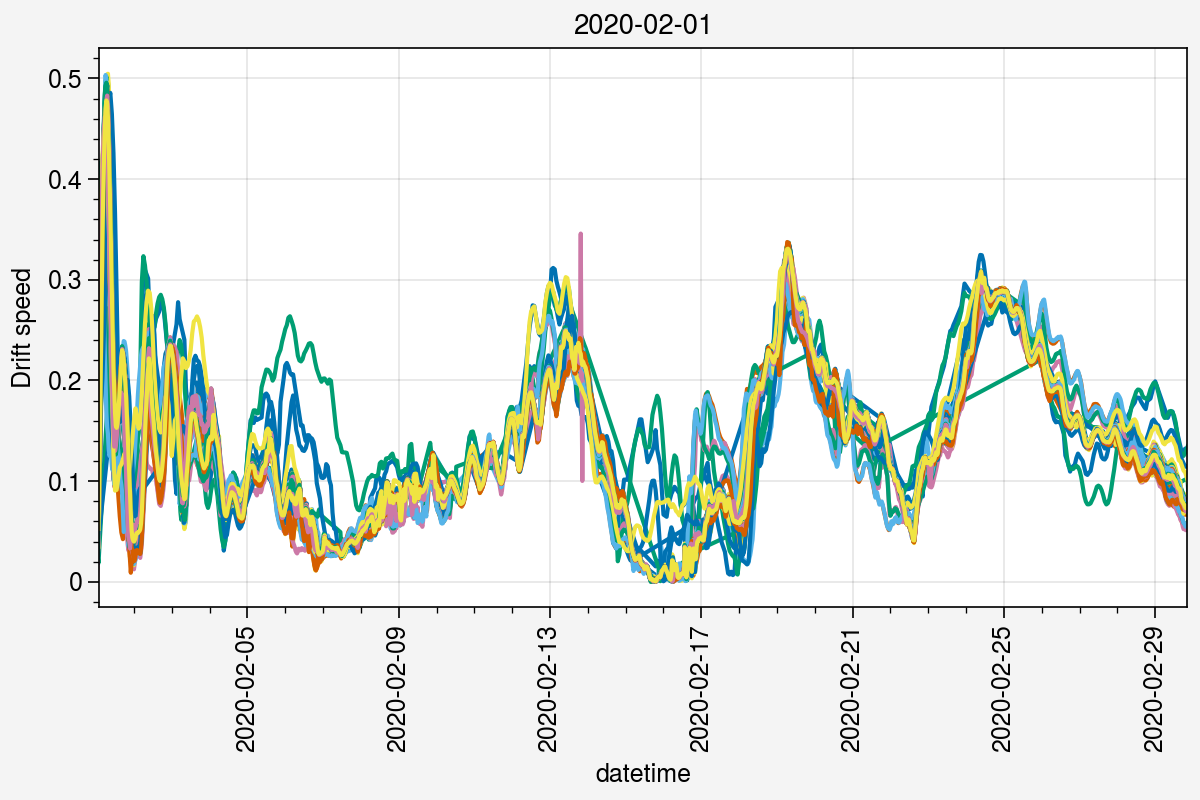

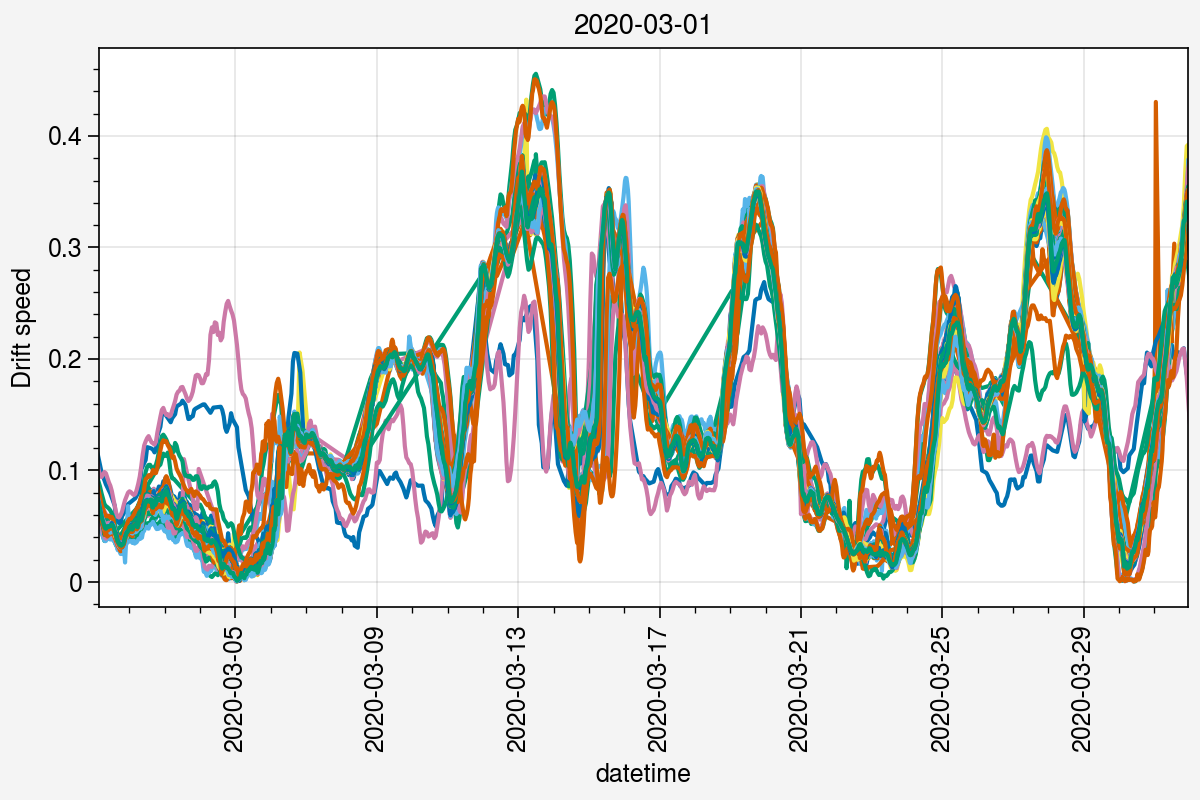

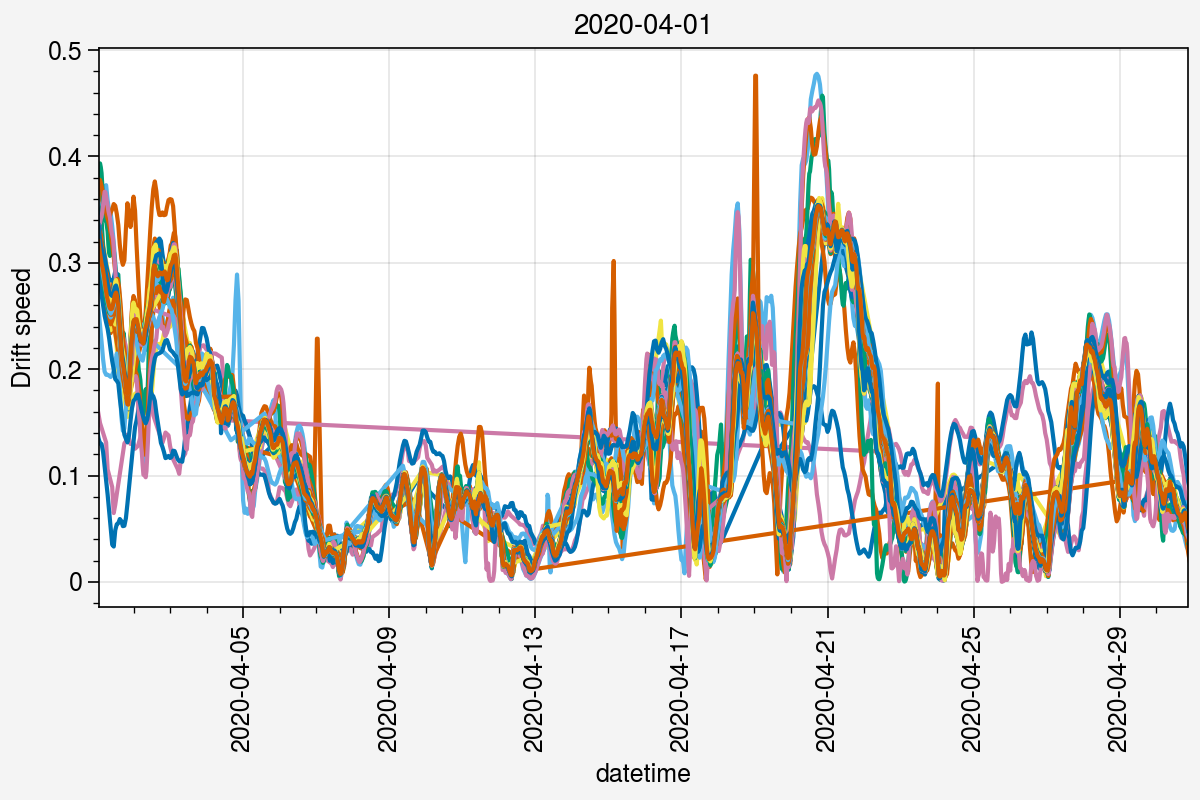

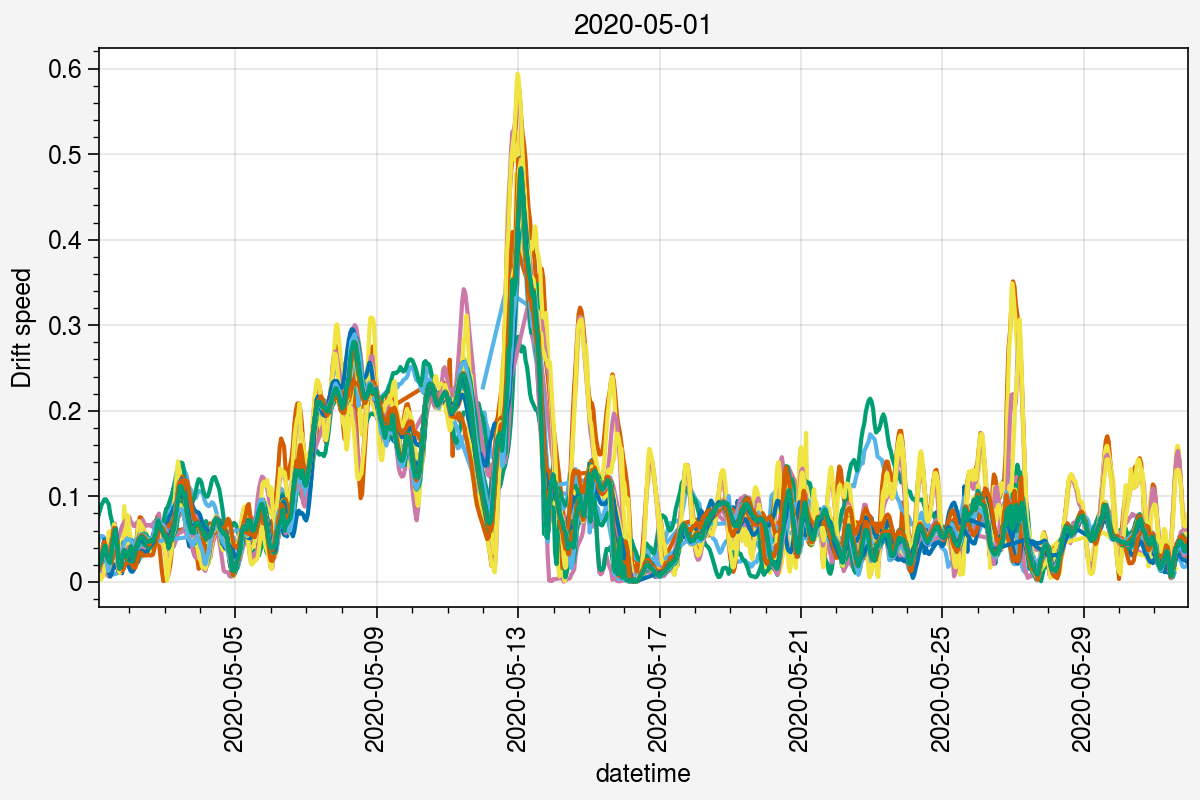

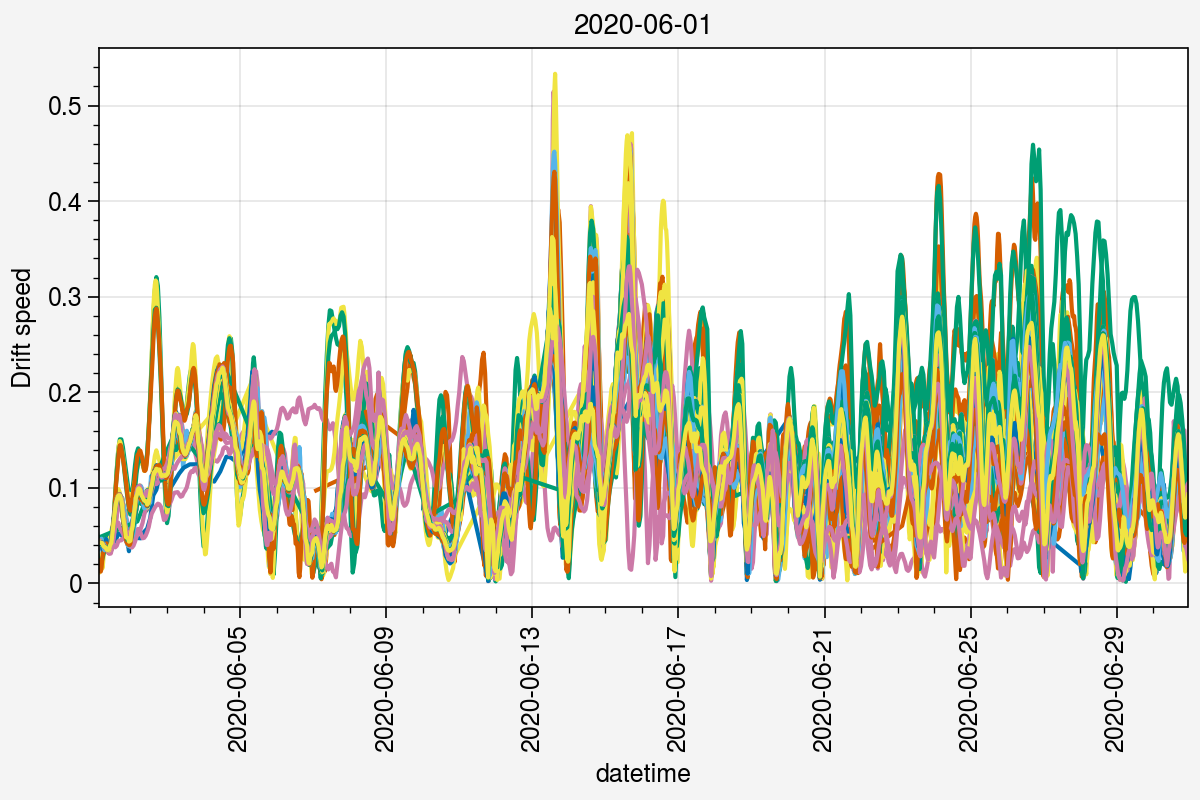

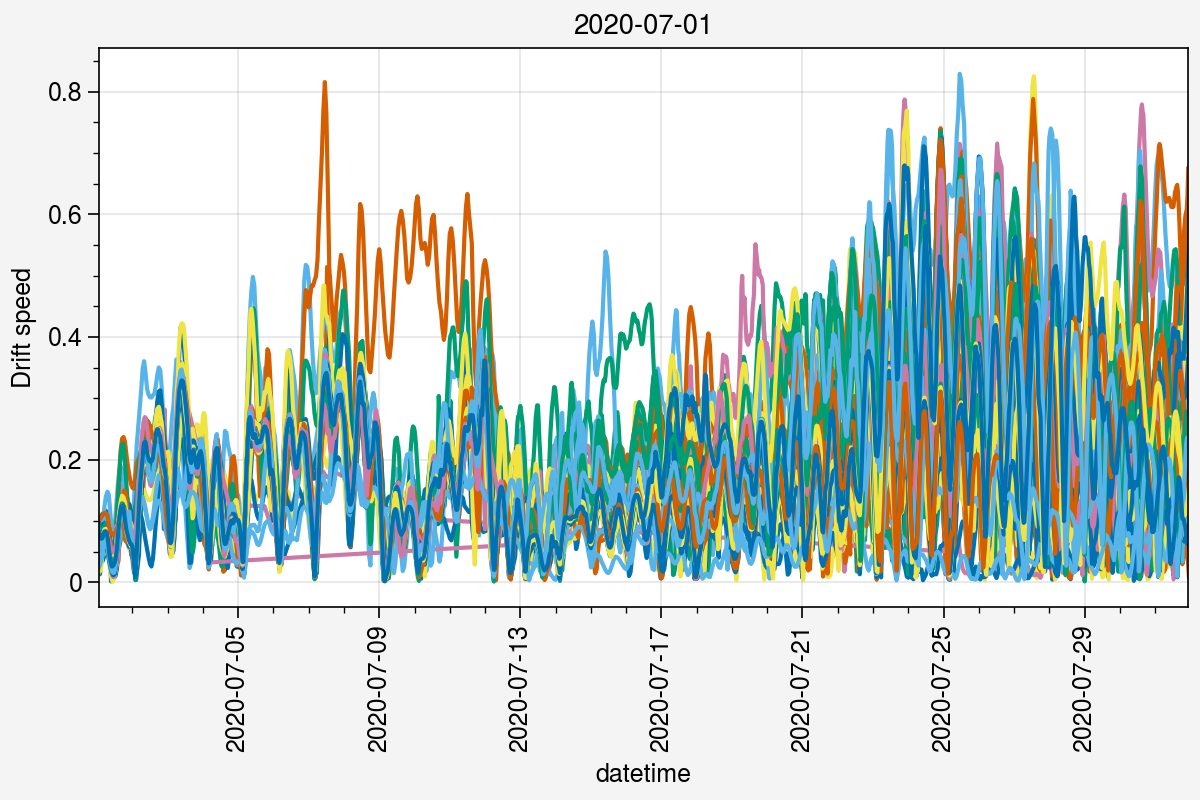

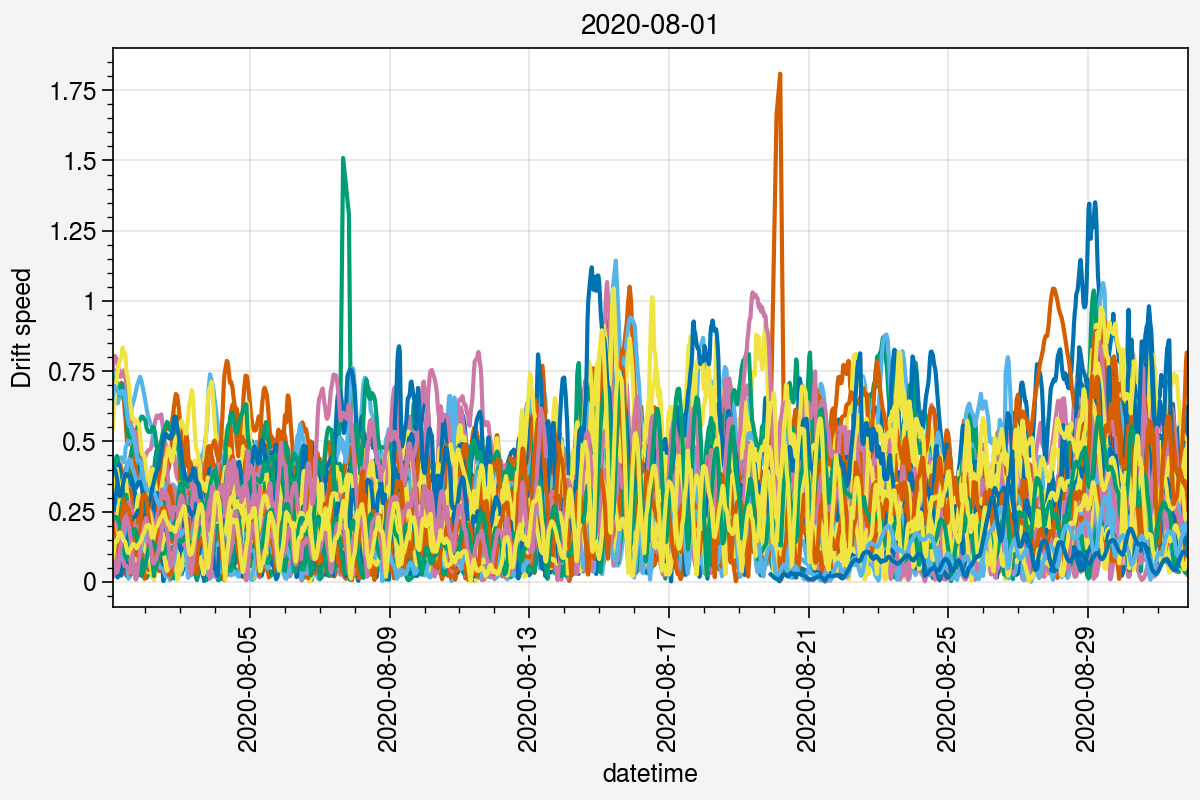

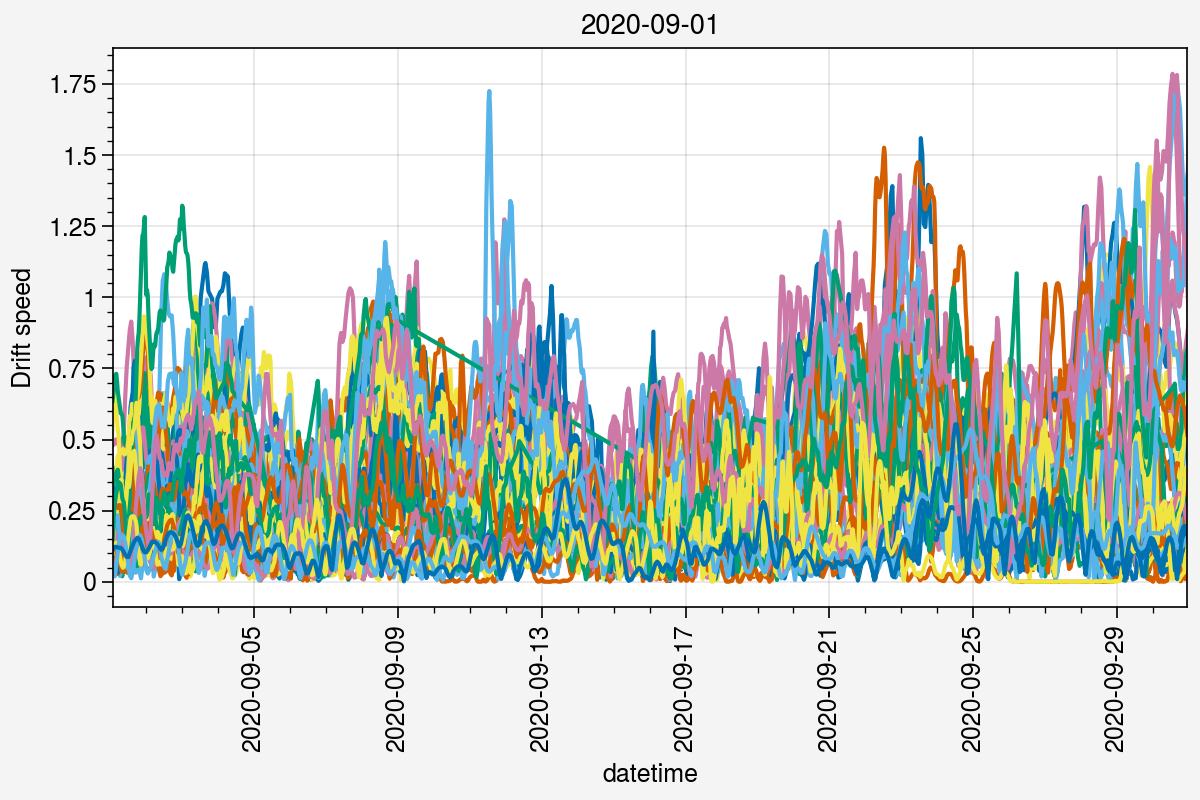

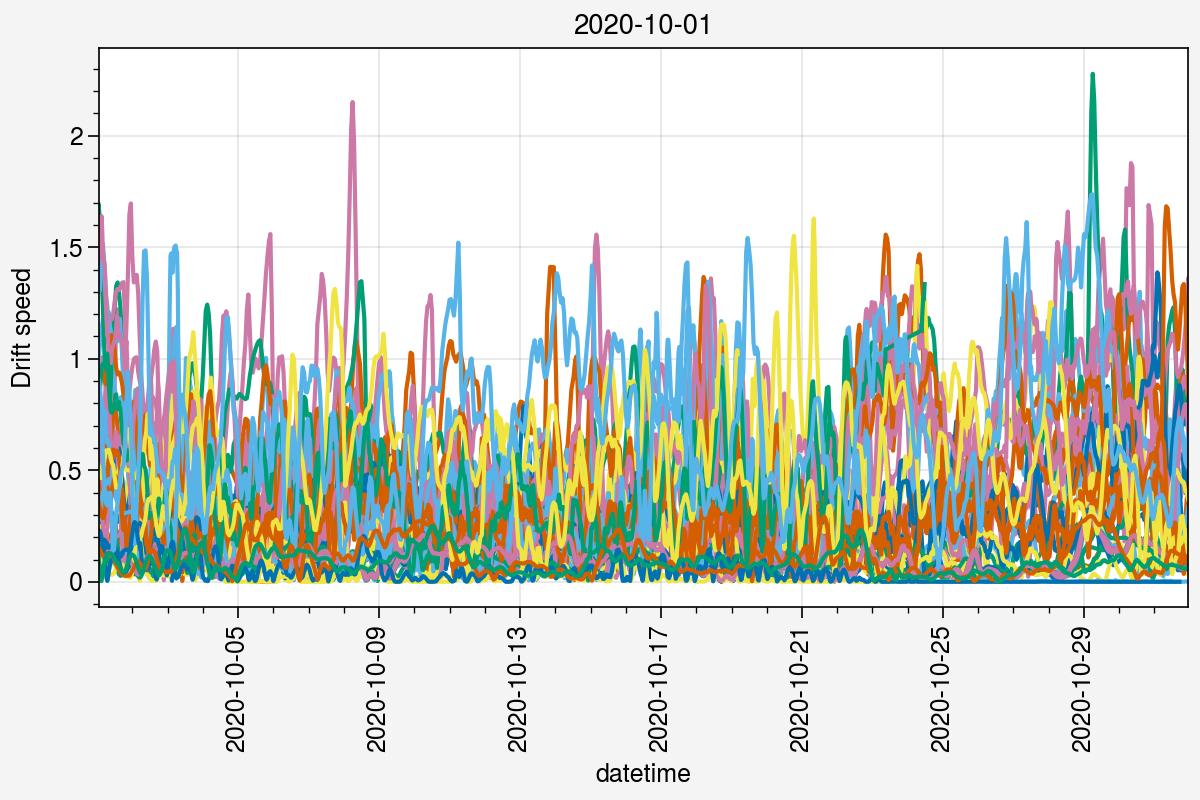

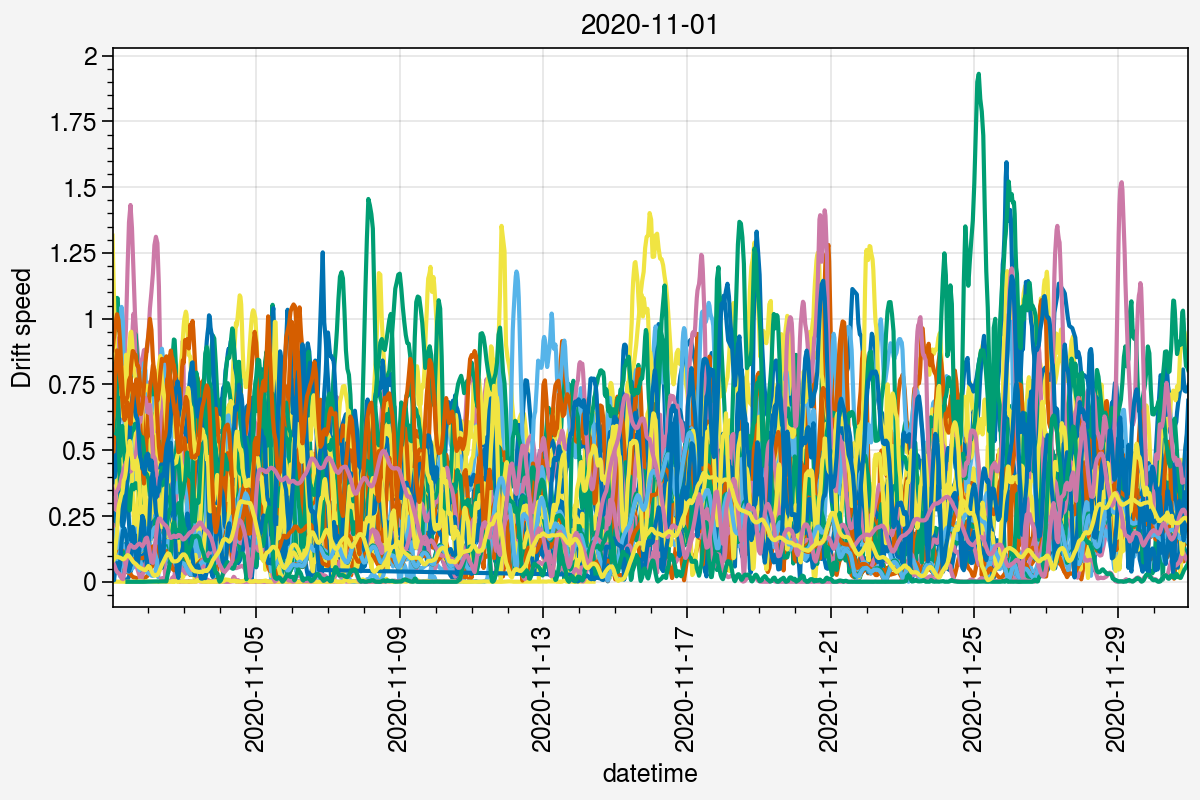

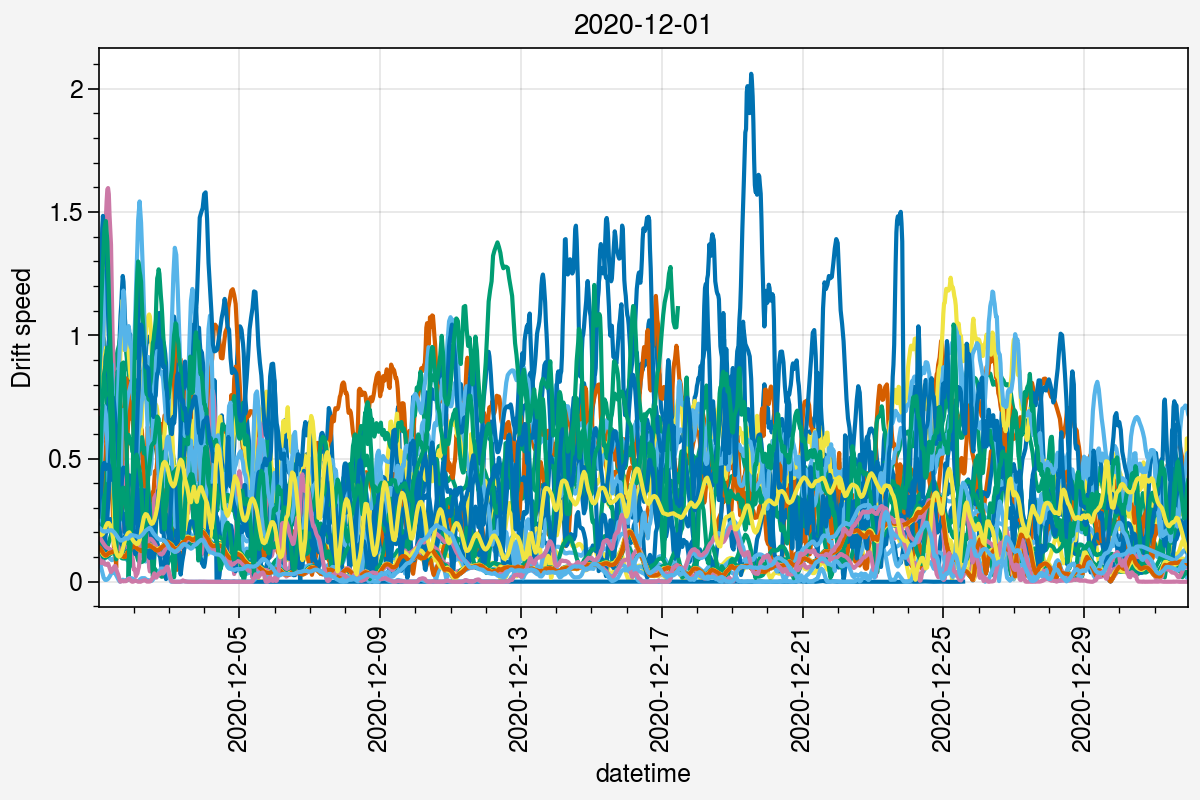

In [16]:

for idx in range(len(month_start) - 1):
    timeslice = slice(month_start[idx], month_start[idx+1]) 
    fig, ax = pplt.subplots(width=6, height=4)
    for buoy in buoy_data_30min:
        if len(buoy_data_30min[buoy].loc[timeslice]) > 0:
            ax.plot(buoy_data_30min[buoy].loc[timeslice, 'speed'])
    ax.format(ylabel='Drift speed', title=month_start[idx].strftime('%Y-%m-%d'))
    fig.save('../qc/' + month_start[idx].strftime('%Y-%m-%d') + '_speed_test.jpg', dpi=300)

In [8]:
buoy_data_30min['2019V2']

x             y  sigma_x_regrid   longitude  \
datetime                                                                      
2020-08-19 20:00:00           NaN           NaN             NaN         NaN   
2020-08-19 21:00:00    -402.57580    -721.86811    5.684342e-14  150.852200   
2020-08-19 22:00:00    -349.29962    -810.31922    1.290961e-03  156.680855   
2020-08-19 23:00:00    -302.52084    -888.10247    3.464361e-04  161.189242   
2020-08-20 00:00:00    -278.64761    -954.22400    1.136868e-13  163.721410   
...                           ...           ...             ...         ...   
2021-03-04 22:00:00  268581.34490  711718.06156    1.033169e-03  -20.675023   
2021-03-04 23:00:00  268316.88887  712807.64438    3.862326e-03  -20.627470   
2021-03-05 00:00:00  268005.90572  714043.43911    0.000000e+00  -20.572900   
2021-03-05 01:00:00  267825.26351  715336.74005    0.000000e+00  -20.526124   
2021-03-05 02:00:00           NaN           NaN             NaN         NaN   

                      latitude         u         v     speed  speed_flag  \
datetime                                                                   
2020-08-19 20:00:00        NaN       NaN       NaN       NaN       False   
2020-08-19 21:00:00  89.992600       NaN       NaN       NaN       False   
2020-08-19 22:00:00  89.992100  0.021901 -0.015701  0.026948       False   
2020-08-19 23:00:00  89.991600  0.015733 -0.015755  0.022266       False   
2020-08-20 00:00:00  89.991100  0.009775 -0.014037  0.017105       False   
...                        ...       ...       ...       ...         ...   
2021-03-04 22:00:00  83.185004  0.151495 -0.227666  0.273464       False   
2021-03-04 23:00:00  83.176695  0.188577 -0.274108  0.332711       False   
2021-03-05 00:00:00  83.167300  0.187360 -0.304868  0.357838       False   
2021-03-05 01:00:00  83.157006       NaN       NaN       NaN       False   
2021-03-05 02:00:00        NaN       NaN       NaN       NaN       False   

                        bearing  
datetime                         
2020-08-19 20:00:00         NaN  
2020-08-19 21:00:00         NaN  
2020-08-19 22:00:00  125.637500  
2020-08-19 23:00:00  135.039883  
2020-08-20 00:00:00  145.148159  
...                         ...  
2021-03-04 22:00:00  146.359141  
2021-03-04 23:00:00  145.473309  
2021-03-05 00:00:00  148.426686  
2021-03-05 01:00:00         NaN  
2021-03-05 02:00:00         NaN  

[4624 rows x 10 columns]